## What is the most optimal skill to learn for Data Analysts?

### Import Libraries and Data

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\karan\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


####  Clean Data

In [2]:
df_DA_IND = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

In [3]:
df_DA_IND = df_DA_IND.dropna(subset=['salary_year_avg'])

df_DA_IND_exploded = df_DA_IND.explode('job_skills')

df_DA_IND_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


## Calculate Percent of Job Postings that Have Skills

In [4]:
df_DA_skills = df_DA_IND_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_IND)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,46,96050.00,48.936170
excel,39,98500.00,41.489362
python,36,96050.00,38.297872
tableau,20,108087.50,21.276596
r,18,79200.00,19.148936
power bi,17,111175.00,18.085106
azure,15,93600.00,15.957447
aws,12,79200.00,12.765957
oracle,11,79200.00,11.702128


Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


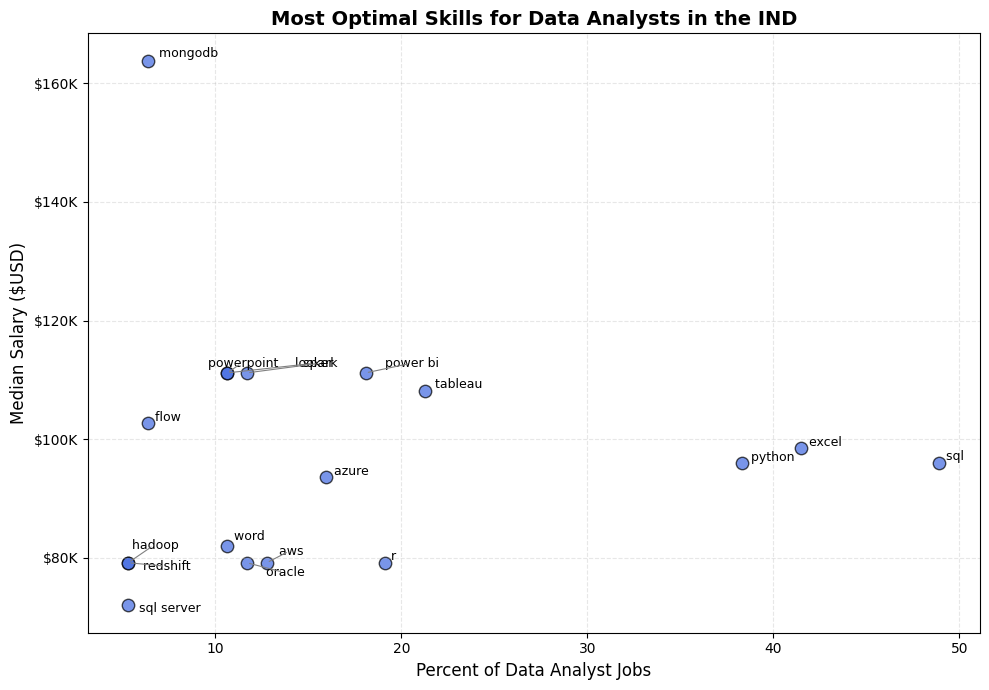

In [5]:
from adjustText import adjust_text
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 7))  # Bigger figure for clarity
plt.scatter(df_DA_skills_high_demand['skill_percent'],
            df_DA_skills_high_demand['median_salary'],
            s=80, color='royalblue', alpha=0.7, edgecolor='k')

# Labels and title
plt.xlabel('Percent of Data Analyst Jobs', fontsize=12)
plt.ylabel('Median Salary ($USD)', fontsize=12)
plt.title('Most Optimal Skills for Data Analysts in the IND', fontsize=14, fontweight='bold')

# Format y-axis as $K
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

# Add labels with small offsets
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(
        plt.text(
            df_DA_skills_high_demand['skill_percent'].iloc[i],
            df_DA_skills_high_demand['median_salary'].iloc[i],
            " " + txt,
            fontsize=9,
            color='black'
        )
    )

# Auto adjust to avoid overlapping labels
adjust_text(
    texts,
    only_move={'points': 'y', 'texts': 'xy'},  # move texts in both directions if needed
    arrowprops=dict(arrowstyle='-', color='gray', lw=0.8),
    expand_points=(1.2, 1.6),
    expand_text=(1.2, 1.6),
    force_points=0.3,
    force_text=0.3
)

plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


## Bonus: Coloring by Technology

In [7]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['splunk',
  'visio',
  'qlik',
  'cognos',
  'sharepoint',
  'powerpoint',
  'sas',
  'power bi',
  'datarobot',
  'ssis',
  'word',
  'msaccess',
  'spss',
  'powerbi',
  'dax',
  'spreadsheet',
  'looker',
  'esquisse',
  'sheets',
  'microstrategy',
  'nuix',
  'alteryx',
  'excel',
  'tableau',
  'sap',
  'ssrs',
  'ms access',
  'outlook'],
 'programming': ['typescript',
  'scala',
  'assembly',
  'ocaml',
  'dart',
  'no-sql',
  'mongo',
  'java',
  'matlab',
  'python',
  'c++',
  'php',
  'lisp',
  'sql',
  'clojure',
  'delphi',
  'f#',
  'cobol',
  'javascript',
  'groovy',
  'pascal',
  'fortran',
  'c',
  'solidity',
  'sas',
  'rust',
  'ruby',
  'erlang',
  'visualbasic',
  't-sql',
  'julia',
  'golang',
  'apl',
  'bash',
  'objective-c',
  'kotlin',
  'sass',
  'css',
  'shell',
  'visual basic',
  'vb.net',
  'c#',
  'vba',
  'crystal',
  'haskell',
  'nosql',
  'powershell',
  'lua',
  'go',
  'mongodb',
  'r',
  'html',
  'elixir',
  'perl',
  'sw

In [40]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

In [41]:
df_technology = df_technology.explode('skills')

In [42]:
df_technology

,technology,skills
0,analyst_tools,splunk
0,analyst_tools,visio
0,analyst_tools,qlik
0,analyst_tools,cognos
0,analyst_tools,sharepoint
...,...,...
9,sync,ringcentral
9,sync,symphony
9,sync,rocketchat
9,sync,zoom


In [43]:
df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')

df_DA_skills_tech


,skill_count,median_salary,skill_percent,technology,skills
0,46,96050.0,48.936170,programming,sql
1,39,98500.0,41.489362,analyst_tools,excel
2,36,96050.0,38.297872,programming,python
3,20,108087.5,21.276596,analyst_tools,tableau
4,18,79200.0,19.148936,programming,r
...,...,...,...,...,...
80,1,165000.0,1.063830,databases,postgresql
81,1,64600.0,1.063830,analyst_tools,ms access
82,1,165000.0,1.063830,databases,mysql
83,1,163782.0,1.063830,databases,neo4j


In [63]:
df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > skill_percent]

14 [ 0.51665022 -0.17621675]
15 [0.60201252 0.04975463]


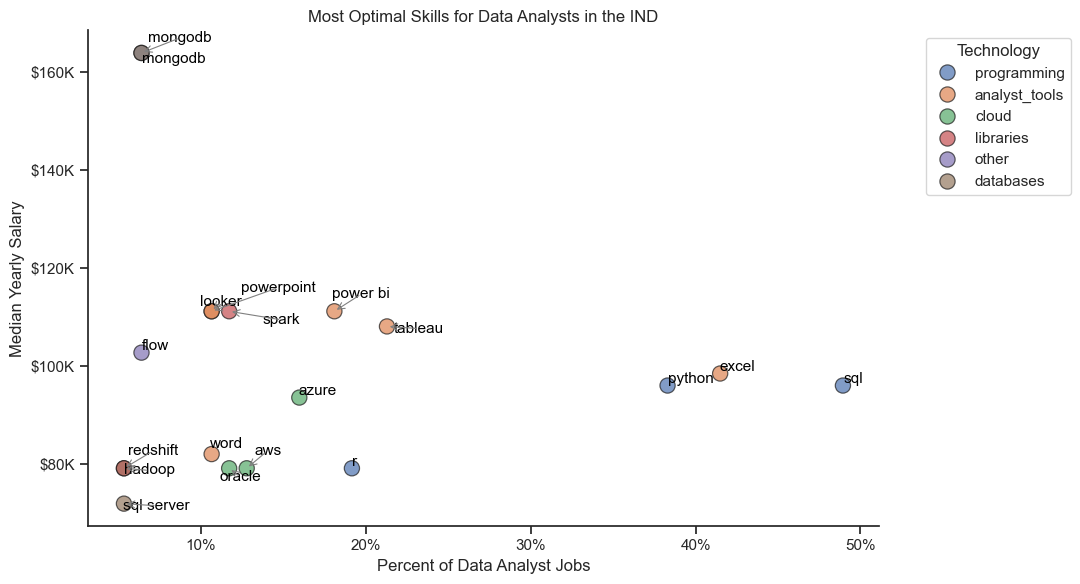

In [68]:
plt.figure(figsize=(11, 6))  # Smaller figure

sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology',
    alpha=0.7,
    s=120,
    edgecolor='k'
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, row in df_DA_skills_tech_high_demand.iterrows():
    texts.append(
        plt.text(
            row['skill_percent'],
            row['median_salary'],
            row['skills'],
            fontsize=11,  # Larger font
            color='black'
        )
    )

# Adjust text to avoid overlap, expand spacing
adjust_text(
    texts,
    arrowprops=dict(arrowstyle='->', color='gray', lw=0.8),
    expand_points=(2, 2),
    expand_text=(2, 2),
    force_text=0.5,
    force_points=0.5
)

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the IND')
plt.legend(title='Technology', bbox_to_anchor=(1.05, 1), loc='upper left')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()